In [164]:
# import the usual
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

% matplotlib inline
pd.set_option('display.max_columns', 500)

In [3]:
#Music Data Loading
df = pd.read_csv("./lastfm-dataset-360k-small/merged-subset.csv",encoding = "ISO-8859-1",index_col=0)
users = pd.read_csv("./lastfm-dataset-360k/usersha1-profile.tsv",sep='\t',names=['userId','gender','age','country','signupDate'])

In [4]:
users['signupDate'] = pd.to_datetime(users['signupDate'],infer_datetime_format=True)
users.head()

,userId,gender,age,country,signupDate
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,2007-02-01
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,2007-12-04
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,2006-09-01
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,2008-04-28
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,2006-01-27


In [17]:
df.head()

,userId,artistId,artist,plays,gender,age,country,signupDate
729211,0aa7f82c5507f4a1f84240775eb4f2d26e558a9e,54b26205-3b93-44f9-9f91-36dba8330f6d,la caina,44,NaN,NaN,Hungary,"Feb 12, 2009"
5641670,528c991795ffd31e11db80a7d299d2438466b52b,4a4ee089-93b1-4470-af9a-6ff575d32704,the prodigy,156,m,28.0,United States,"Jun 1, 2005"
7885479,733a9ecaf701c8b16941503ea6f4d5d4e2bd9548,cf66ee44-360b-445e-bfb8-e20e69325742,donavon frankenreiter,35,m,NaN,Netherlands,"Nov 2, 2008"
12211333,b2832d6384917dcf3a1642f053dd28430bb9203a,078a9376-3c04-4280-b7d7-b20e158f345d,a perfect circle,29,f,22.0,Turkey,"Jan 8, 2009"
13688116,c7f9b1544f8378b38e2509ad5d28c045b9515860,dbbc47a5-1338-4830-9298-a8d0b11c0a46,joss stone,33,m,28.0,India,"Feb 8, 2006"


## Missing Data

Deal with this first in the first cleaning script and then explore

In [168]:
for column in list(df.columns):
    print ("{}% of the data from {} column is missing".format(round(df[column].isnull().sum() * 100 / len(df.gender),2), column))

0.0% of the data from userId column is missing
1.26% of the data from artistId column is missing
0.0% of the data from artist column is missing
0.0% of the data from plays column is missing
9.15% of the data from gender column is missing
21.08% of the data from age column is missing
0.0% of the data from country column is missing
0.0% of the data from signupDate column is missing


## Most Active Users

In [5]:
user_count = pd.pivot_table(df,index="userId",values="plays",aggfunc="sum").sort_values(ascending=False)

In [24]:
user_count.head()

userId
9107e54b8020edc73db7397659cdeb44f2cd19d0    17610
a5db24bccb1b2f4214d779eb0524e5d5debdb8b6     9902
549d366073d97fd21468370f3f8bf1321f4bb3c9     8977
0b1197688ceb5749fc73d3309006411e3fc80882     7539
00cb0a011b2a626372f3bfd8eeeec2bd022ab829     7366
Name: plays, dtype: int64

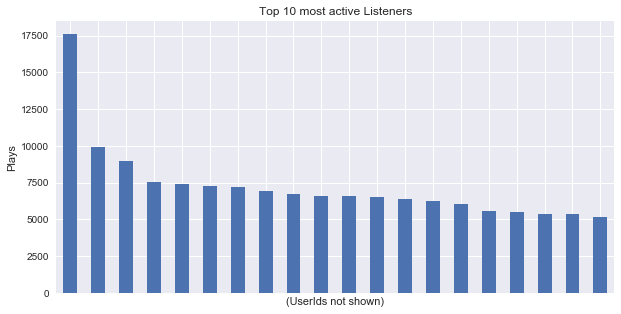

In [13]:
fig = plt.figure(figsize=(10,5))
user_count.head(20).plot(kind='bar')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.ylabel("Plays")
plt.xlabel("(UserIds not shown)")
plt.title("Top 10 most active Listeners")

## Most Popular Artists

In [18]:
top_artists = pd.pivot_table(df,index="artist",values="plays",aggfunc="sum").sort_values(ascending=False)

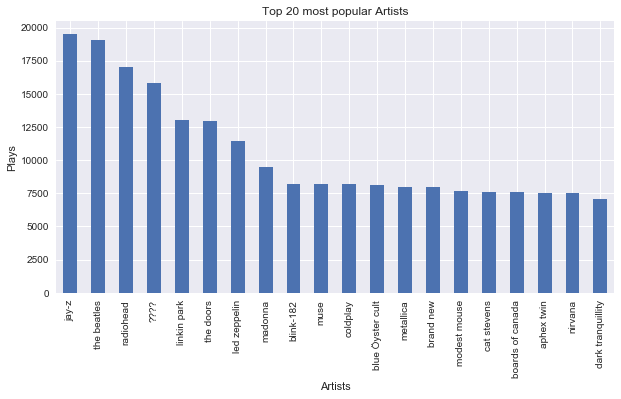

In [20]:
fig = plt.figure(figsize=(10,5))
top_artists.head(20).plot(kind="bar")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off')         # ticks along the top edge are off) # labels along the bottom edge are off
plt.ylabel("Plays")
plt.xlabel("Artists")
plt.title("Top 20 most popular Artists")

In [21]:
artistids = df["artistId"].unique()
counter = 0
for i in artistids:
    
    vcs = df.loc[df["artistId"] == i,"artist"].value_counts()
    count = len(vcs)
    if count > 1:
        counter += 1
print (counter)

32


## Gender
### Gender Proportions

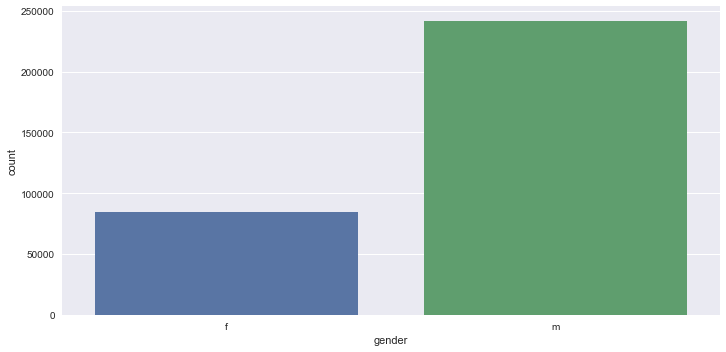

In [21]:
sns.factorplot(data=users,x='gender',kind='count',size=5, aspect=2)

## Countries

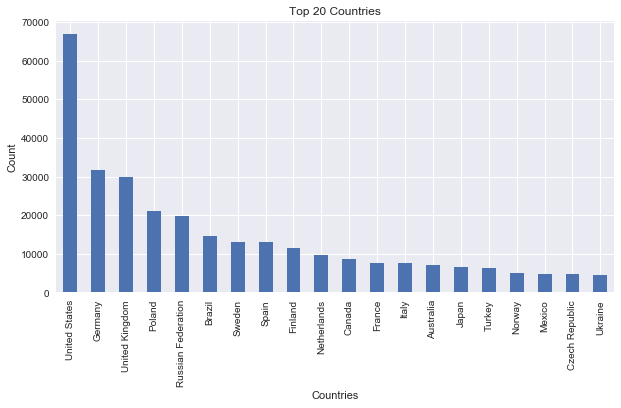

In [22]:
fig = plt.figure(figsize=(10,5))
users.country.value_counts().sort_values(inplace=False,ascending=False).head(20).plot(kind='bar')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off')         # ticks along the top edge are off) # labels along the bottom edge are off
plt.ylabel("Count")
plt.xlabel("Countries")
plt.title("Top 20 Countries")

## Age

In [161]:
users = users.loc[(users['age'] > 8) & (users['age'] <= 122)]

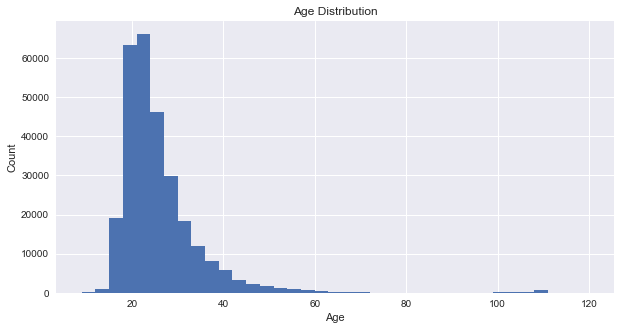

In [167]:
fig = plt.figure(figsize=(10,5))
bins = np.arange(users.age.min(),users.age.max(),3)
users.age.plot(kind='hist',bins=bins)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off')         # ticks along the top edge are off) # labels along the bottom edge are off
plt.ylabel("Count")
plt.xlabel("Age")
plt.title("Age Distribution")

## Signup Date

In [135]:
#Convert to timeseries
users['signupDate'] = pd.to_datetime(users['signupDate'],infer_datetime_format=True)
ts = pd.DataFrame(index=users['signupDate'],columns=['userId'])
ts['userId'] = list(users['userId'])
ts2 = pd.DataFrame(index=users['signupDate'],columns=['count'])
ts2['count'] = 1

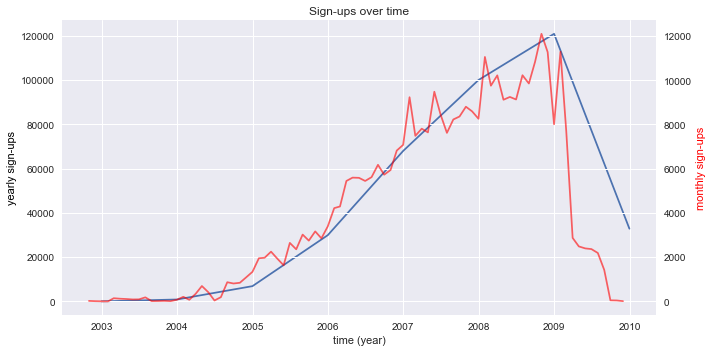

In [90]:
#Year-by-year signup
temp = ts2.resample('A').sum()
temp2 = ts2.resample('M').sum()

# fig = plt.figure(figsize=(10,5))
# plt.plot(temp)
# plt.plot(temp2,alpha=0.4,color='blue')
# plt.title("Year-by-Year SignUps")


fig, ax1 = plt.subplots(sharex=True, figsize=(10,5))
plt.title("Sign-ups over time")
ax1.plot(temp)
ax1.set_xlabel('time (year)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('yearly sign-ups', color='black')
# ax1.tick_params(temp['count'], colors='black')

ax2 = ax1.twinx()
ax2.plot(temp2,color='red',alpha=0.6)
ax2.set_ylabel('monthly sign-ups', color='red')
# ax2.tick_params(temp2['count'], colors='black')

fig.tight_layout()
plt.show()

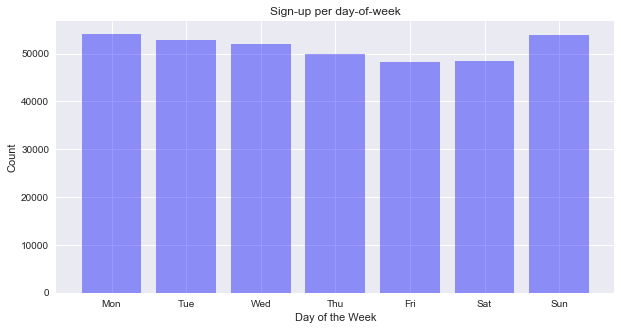

In [115]:
temp = ts2.groupby(ts2.index.dayofweek).sum()

fig = plt.figure(figsize=(10,5))
plt.bar(temp.index,list(temp['count']),color='b',alpha=0.4)
plt.title("Sign-up per day-of-week")
plt.xticks([i for i in range(7)],["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.xlabel("Day of the Week")
plt.ylabel("Count")

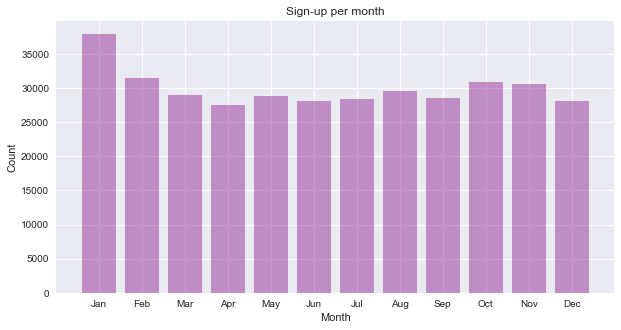

In [121]:
temp = ts2.groupby(ts2.index.month).sum()

fig = plt.figure(figsize=(10,5))
plt.bar(temp.index,list(temp['count']),color='purple',alpha=0.4)
plt.title("Sign-up per month")
plt.xticks([i+1 for i in range(0,12)],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.xlabel("Month")
plt.ylabel("Count")